In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import roc_curve, roc_auc_score

## SVM
* support vector machine
* 분류나 회귀분석에 사용가능한 기법
   + 분류쪽 성능이 뛰어나서 주로 분류에 많이 사용
* 신경망에 비해 간결해서 뛰어난 성능을 보여준 탓에
  신경망에 암흑기를 가져다 준 대표적인 머신러닝 알고리즘
* 이미지 인식이나 필체패턴 인식과 같은 작업에 주로 사용
* 마진을 최대로 하는 결정경계를 찾는 것이 SVM의 주된 알고리즘
* 결정경계는 서로 다른 분류값을 결정짓는 경계
   + line, plane(2D), hyperplane(3D)
* 마진은 결정경계와 서포트벡터간의 거리를 의미
* 서포트벡터는 결정경계를 만드는데 영향을 주는 최전방 데이터

## 최적의 결정경계 찾기
* 빨간점과 노란점으로 구성된 집합을 적절히 구분하려고 할때
* 3개의 직선중 어느것이 가장 최적으로 분류한 것일까?
* 두 개의 데이터 집합을 잘 분리하는 직선을 그려봄


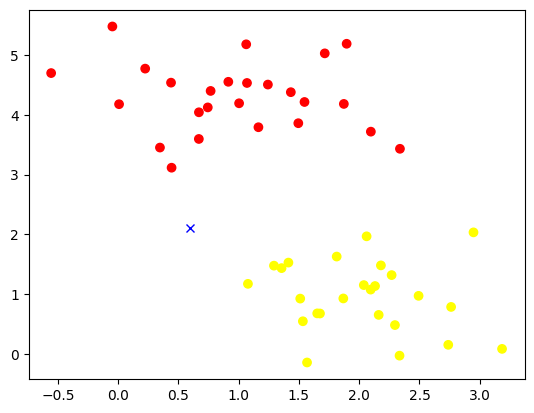

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
     cluster_std=0.6, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.plot([0.6],[2.1], 'x', color='blue') 
plt.show()

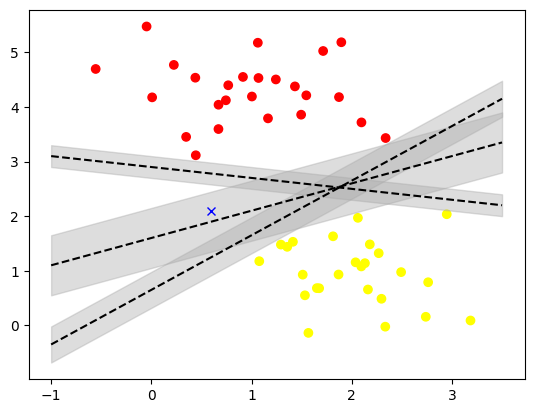

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.plot([0.6],[2.1], 'x', color='blue') # 테스트 점

xfit = np.linspace(-1, 3.5)
for m,b,d in [(1,0.65,0.33), (0.5,1.6,0.55),
              (-0.2,2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k--')
    plt.fill_between(xfit, yfit-d, yfit+d,
          color='#AAAAAA', alpha=0.4)
plt.show()

## svm을 이용해서 초평면 구하기

In [5]:
# kernel : 초평면을 구하는 알고리즘
svclf = SVC(kernel='linear')
svclf.fit(X, y)

SVC(kernel='linear')

In [6]:
# 학습 결과
print(svclf.score(X, y))

1.0


In [7]:
# 결정경계 회귀계수
print(svclf.coef_[0][0], svclf.coef_[0][1])
print(svclf.intercept_[0])

0.22967329367066203 -1.3775826241987321
3.189713537020001


In [8]:
# 서포트벡터들의 좌표
svclf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

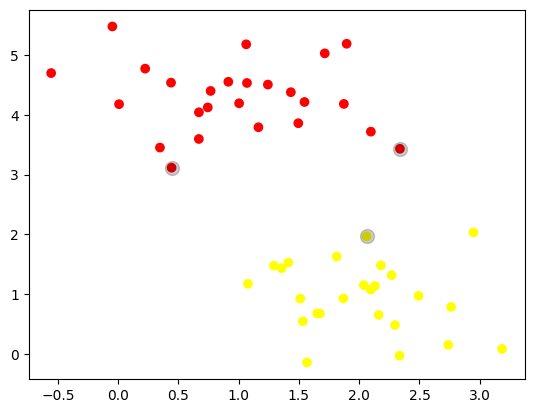

In [9]:
# 결정경계 시각화
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.scatter(svclf.support_vectors_[:, 0],
            svclf.support_vectors_[:, 1], s=100,
            facecolor='k', alpha=0.2)  # 서포트벡터 표시
plt.show()

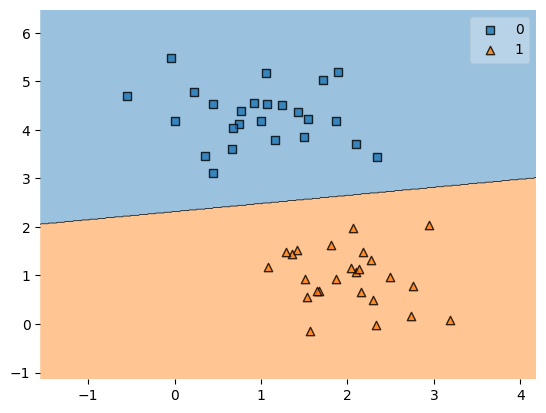

In [10]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y, clf=svclf)
plt.show()

## 비선형 분류
* 선형적으로 분류가 불가능한 경우에 대해서도
  초평면을 구할 수 있을까?

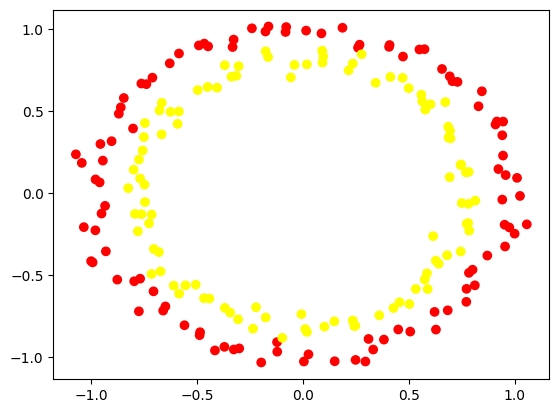

In [11]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200,
        noise=0.04, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.show()

## 커널 트릭
* 구분이 불가능한 집합은 
  구분이 가능한 방향으로 맵핑시킨 
  새로운 공간에서는 구분이 가능할 것임
* 차원을 변환시키는 mapping 함수를 통해
  기존의 2차원 공간에 새로운 차원을 추가해서
  3차원으로 변환할 수 있다면 선형적으로 구분이 가능해 짐
* 선형적으로 불가능한 차원을
  선형적으로 구분이 가능한 고차원으로 변환하는 것을
  커널 트릭이라 하고
  이때 사용하는 함수를 커널 함수라 함
* 대표적인 커널함수는 카우시안 커널RBF이고
  이것을 통해 무한대 차원으로 매핑 가능

## 2차원 데이터를 3차원으로 변환후 시각화

In [12]:
from mpl_toolkits.mplot3d import Axes3D

X, y = make_circles(n_samples=200,
        noise=0.04, random_state=0)

In [13]:
# 커널함수 : 2차원을 3차원으로 변환
z = np.exp(-(X ** 2).sum(1))

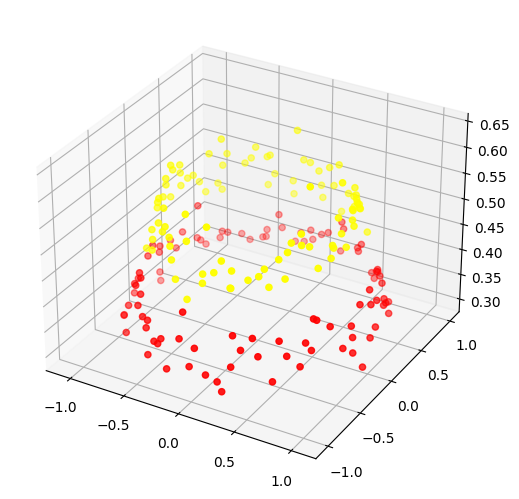

In [14]:
# 3차원으로 시각화
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(X[:,0], X[:,1], z, c=y, cmap='autumn')
plt.show()

In [15]:
# SVC 초매개변수
# C(cost) : 규제 매개변수 (정확도 제한)
# gamma   : 결정경계 곡률(마진) 조정 (값이 크면 결정경계면은 좁아짐)
svclf = SVC(kernel='rbf', C=10, gamma=0.1, random_state=0)
svclf.fit(X, y)
svclf.score(X, y)

0.99

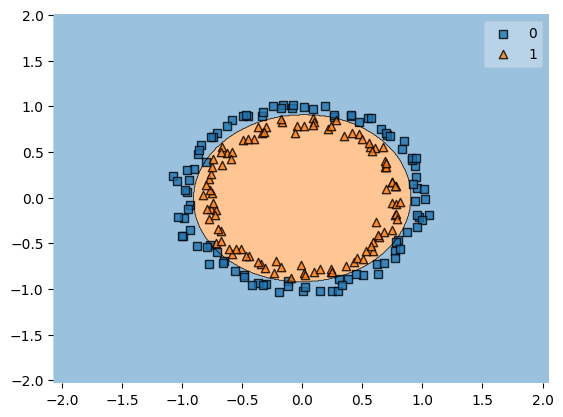

In [16]:
plot_decision_regions(X,y, clf=svclf)
plt.show()

## SVM 규제/감마 매개변수 알아보기

In [17]:
!pip install mglearn

In [18]:
!pip install --upgrade joblib==1.1.1

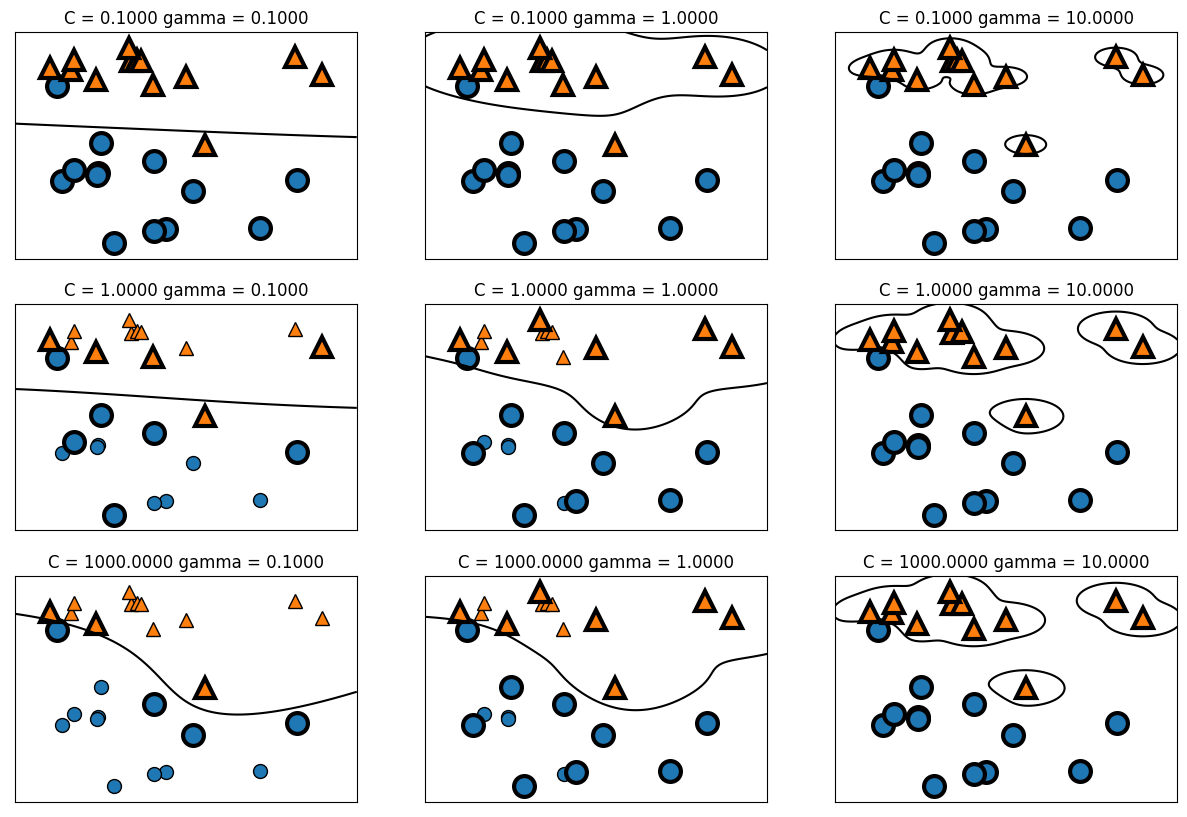

In [19]:
import mglearn

fig,axes = plt.subplots(3,3, figsize=(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
       mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

## SVM을 이용해서 과일/단백질/채소 분류하기

In [20]:
fresh = pd.read_csv('data/fresh.csv', encoding='euc-kr')
fresh.columns = ['name','sweet','crunchy','class']
fresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     15 non-null     object
 1   sweet    15 non-null     int64 
 2   crunchy  15 non-null     int64 
 3   class    15 non-null     object
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes


In [21]:
fresh['target'] = fresh['class'].map({'과일':0,'단백질':1,'채소':2})
fresh.head(3)

,name,sweet,crunchy,class,target
0,포도,8,5,과일,0
1,생선,2,2,단백질,1
2,당근,6,10,채소,2


In [32]:
data = fresh.loc[:,['sweet','crunchy']]
target = fresh.target

In [33]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211211235)

In [44]:
svclf = SVC(kernel='rbf', C=10, gamma=0.1, random_state=0)
svclf.fit(data.to_numpy(), target.to_numpy())
svclf.score(data.to_numpy(), target.to_numpy())

1.0

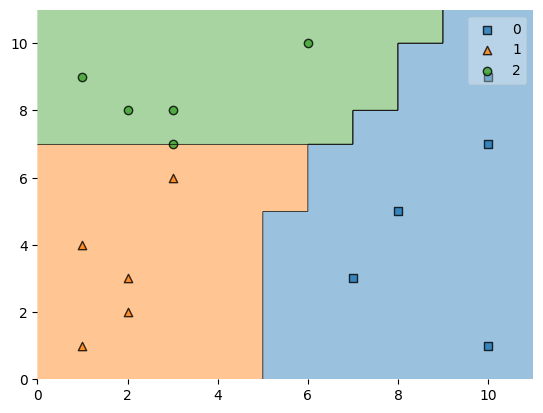

In [45]:
plot_decision_regions(data.to_numpy() ,target.to_numpy(), clf=svclf)
plt.show()

In [ ]:
fig,axes = plt.subplots(3,3, figsize=(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
       mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)